In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import networkx as nx
import igraph as ig
import seaborn as sns
import cairo  

In [2]:
#read dataset
test = pd.read_csv('C:/Users/zacha/Desktop/Data_Science_Portfolio/datasets/Classroom_2011_W4.csv', skiprows =1,names=list(np.arange(1,76)))
testmg = ig.Graph.Adjacency((test.values>0).tolist())
testmg.to_undirected()
testmg.vs['ID'] = test.index
test.head()

,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
AD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AJ,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BA,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
BS,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
CC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#read in attibutes
Classroom_attributes = pd.read_csv('C:/Users/zacha/Desktop/Data_Science_Portfolio/datasets/Classroom_2011_attributes.csv')
Classroom_attributes

,ID,Ethnicity,Gender,Group,Attend1,Attend2,Attend3,E1,E2,E3,Partic,Paper
0,AD,1,2,10,100,100,100,93,84,75,100,71
1,AJ,2,2,1,100,75,100,80,68,69,86,80
2,BA,2,2,7,100,100,100,47,67,70,89,85
3,BS,1,1,8,100,75,100,93,77,74,100,83
4,CC,3,1,5,100,100,100,71,49,77,78,86
...,...,...,...,...,...,...,...,...,...,...,...,...
70,WL,3,2,3,100,100,100,63,42,49,97,93
71,WO,3,2,2,100,100,100,71,86,58,100,70
72,YJ,1,2,9,50,100,100,70,75,78,96,82
73,YR,1,1,9,0,50,50,52,48,61,75,82


The data was collected over an 11 week period covering a school course.Studnets test scores were compared with their connections and their attributes, which are listed below in detaail and above in a table. For this analysis, I will only be looking at the fourth wave which was collected at week 11 of the class

### the distribution of the categories and variables of those attributes.

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

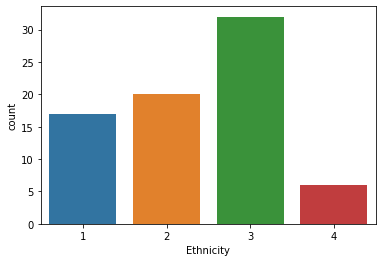

In [4]:
sns.countplot(data=Classroom_attributes, x = 'Ethnicity')

*Note* ethnicity is mostly asian

<AxesSubplot:xlabel='Group', ylabel='count'>

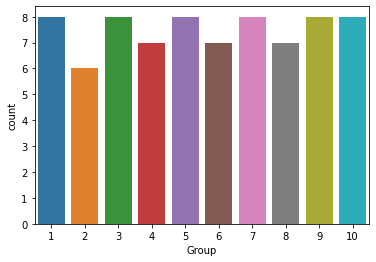

In [5]:
sns.countplot(data=Classroom_attributes, x = 'Group')

*Note* groups are mostly even

<AxesSubplot:xlabel='Gender', ylabel='count'>

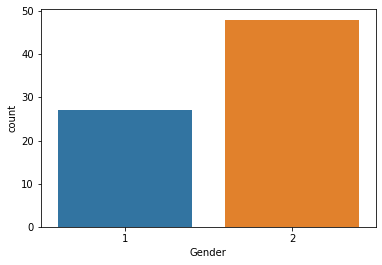

In [6]:
sns.countplot(data=Classroom_attributes, x = 'Gender')

*Note* there are more girls than guys

In [7]:
for x in Classroom_attributes.columns:
    testmg.vs[x] = Classroom_attributes.loc[Classroom_attributes.ID==testmg.vs['ID'], x]
    
    
layout = testmg.layout_kamada_kawai()

gender_shape = {1: "circle", 2: "rectangle"}
group_color = {1: "blue", 2: "lime",3: "orange",4: "cyan",5: "yellow"\
              ,6: "pink", 7: "purple",8: "white",9: "aqua",10: "gray"}
ethnicity_color = {1: "blue", 2: "black",3: "brown",4: "red"}
testmg.vs['label_cex'] = 40*np.array(testmg.outdegree())/max(testmg.outdegree())


plot = ig.plot(testmg, layout=layout, 
        vertex_shape = [gender_shape[gender] for gender in testmg.vs['Gender']],
        vertex_color = [group_color[group] for group in testmg.vs['Group']], 
        vertex_label = testmg.vs['ID'],
        vertex_label_color = [ethnicity_color[ethnicity] for ethnicity in testmg.vs['Ethnicity']],
        vertex_size = testmg.vs['label_cex'],
        vertex_label_size = 25*np.array(testmg.eigenvector_centrality()),
        edge_arrow_size = .2,
        edge_width = .2,
        bbox = (800,500),
        margin = (9,9,10,9))

Nodes are asigned to groups via their color, For example group 2 is black. Sex is represnmted by shape 9circle vs square) and the persons ethncnity changes with the color of their label's letter. The people in the center of the network have the highest number of incoming connections and the people on the outside have the least. The larger the shape of the circle or square, the more out degree centrality they have. The larger the label, the more eigenvector centrality there is. People with large labels and shapes are very connected and also connected to well connected others.

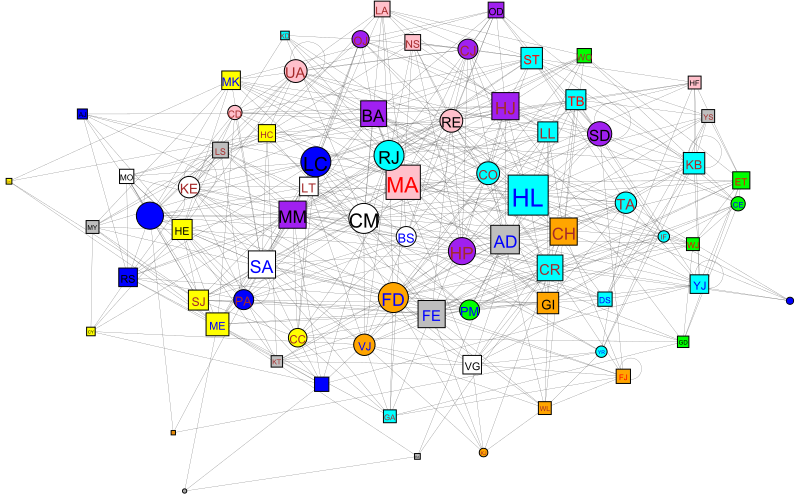

In [8]:
plot

In [9]:
test1 = test
test1.index= list(np.arange(1, 76))
unfriendship = nx.from_pandas_adjacency(test)
dirfriend = nx.from_pandas_adjacency(test, create_using=nx.DiGraph())
unfriendshipdens = nx.from_pandas_adjacency(test1)
dirfrienddens = nx.from_pandas_adjacency(test1, create_using=nx.DiGraph())
print("Undirected density: ", round(nx.density(unfriendshipdens), 3))
print("Directed density: ", round(nx.density(dirfrienddens), 3))

Undirected density:  0.174
Directed density:  0.161


*Note* Despite the messines of the above graph, there is not a lot of density. A lot of potential ties exist

### Girvan-Newman community detection algorithm.

In [10]:
testmg.cliques(min=5)

[(41, 46, 47, 53, 58),
 (0, 7, 32, 63, 72),
 (7, 29, 32, 63, 72),
 (8, 37, 43, 50, 65),
 (8, 43, 50, 56, 65),
 (28, 29, 30, 38, 46),
 (1, 46, 47, 53, 58),
 (1, 41, 46, 47, 53, 58),
 (1, 38, 46, 53, 58),
 (1, 41, 46, 53, 58),
 (1, 41, 47, 53, 58),
 (1, 41, 46, 47, 58),
 (1, 41, 46, 47, 53)]

In [11]:
gn = testmg.community_edge_betweenness()
gn = gn.as_clustering()

dfgn = pd.DataFrame(gn.membership, columns=['gn'])
dfgn.head()

,gn
0,0
1,1
2,2
3,2
4,3


In [12]:
dfgn.describe()

,gn
count,75.000000
mean,12.600000
std,13.403307
min,0.000000
25%,2.000000
50%,6.000000
75%,24.000000
max,41.000000


## random walk community detection algorithm.  

In [13]:
friend_comm_wt = testmg.community_walktrap(steps=5)
friend_comm_wt = friend_comm_wt.as_clustering()
testmg.vs['membership'] = friend_comm_wt.membership

dfrw = pd.DataFrame(friend_comm_wt.membership, columns=['friend_comm_wt'])
dfrw.head()

,friend_comm_wt
0,0
1,1
2,0
3,0
4,2


In [14]:
dfrw.describe()

,friend_comm_wt
count,75.000000
mean,1.080000
std,1.522445
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,6.000000


In [15]:
pd.options.display.max_rows = 75

cb = pd.DataFrame(gn.membership, columns=['gn'])
cb['rw'] = friend_comm_wt.membership

cb

,gn,rw
0,0,0
1,1,1
2,2,0
3,2,0
4,3,2
5,4,2
6,5,0
7,0,0
8,2,0
9,0,0


In [16]:
cb.corr()

,gn,rw
gn,1.000000,0.364496
rw,0.364496,1.000000


In [17]:
cb.max()

gn    41
rw     6
dtype: int64

The methods were very different in their group partitioning. Even after tweeking the number of steps in the hyper paramaters to be the highest correlation, the groups were still incredibility different. Because the network is so blobby, with one central blob of well connected people in the middle and less connected people on the outside, I imagine its hard to sepearte a group. Overall, the correlation was week and the Girvan Newman found 41 groups and the random walkj found 7

### Girvan-Newman Grouping Colors:

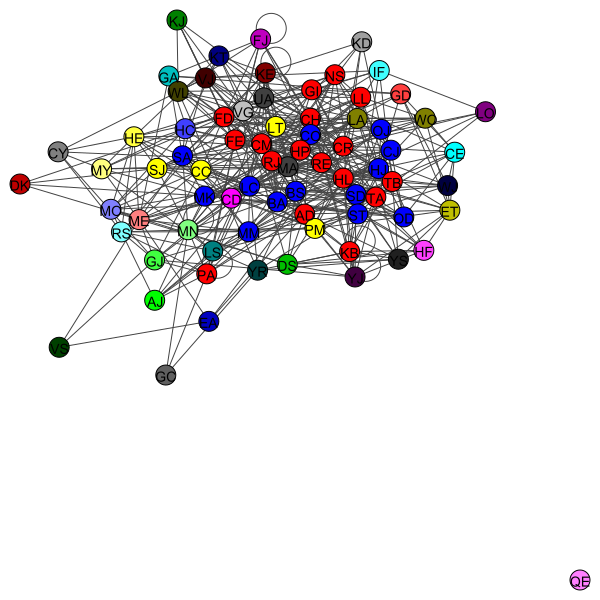

In [18]:
gn = testmg.community_edge_betweenness()
gn = gn.as_clustering()


ig.plot(testmg, vertex_color=gn.membership,
        vertex_label=testmg.vs['ID'],
        palette=ig.ClusterColoringPalette(len(set(gn.membership))))

### Random Walk Coloring :

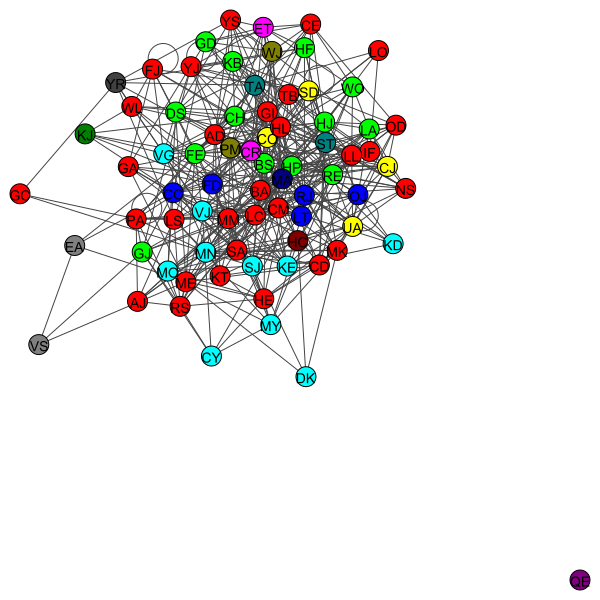

In [19]:
friend_comm_wt = testmg.community_walktrap(steps=200)
friend_comm_wt = friend_comm_wt.as_clustering()

ig.plot(testmg, vertex_color=friend_comm_wt.membership,
        vertex_label=testmg.vs['ID'], 
        palette=ig.ClusterColoringPalette(len(set(friend_comm_wt.membership))))

The partioning doesnt make too much sense. There arent communities within the network to pick up on, as the network is one dense blob. There are multiple ways the network can be divided attribute wise, but not connection wise. I guess this is an important issue with blob networks. I think the issue lies with the setting, this class must have had a third of the students be extroverted and speak out a lot, with the majority of students talking less and eventually not really making friends at all towards the outskirts. There doesnt really seem to be isolated groups 